### Installing required libraries

In [2]:
!pip install pandas numpy matplotlib seaborn plotly requests scikit-learn 

### Importing reuired libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import requests

### Loading the Diwali sales data

In [17]:
df = pd.read_csv("C:\\Users\\Mahek\\Downloads\\Diwali-Sales-Data.csv", encoding='latin1')

In [18]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


### Checking DataFrame structure and column information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### Summarizing dataset statistics

In [14]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


### 1. Calculating the total number of unique customers in our dataset by checking for unique entries in the User_ID column.

In [15]:
df['User_ID'].nunique()

3755

### 2. Identifying the unique states represented in the dataset by checking distinct values in the State column.

In [16]:
df['State'].nunique()

16

The dataset includes 16 unique states, reflecting a broad geographic distribution of orders.

### 3. Calculating the total number of missing values in each column to understand data completeness.

In [17]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

- **Amount** column has 12 missing values, which may require filling or imputation to maintain data integrity for analyses involving monetary amounts.
- **Status** and **unnamed1** columns have 11,251 missing values, indicating they are completely null in the dataset. Therefore, we will remove these columns as they do not provide usable data.
  

Now we are dropping the Status and unnamed1 columns from the DataFrame.

In [20]:
df.drop(['Status', 'unnamed1'], inplace = True, axis =1)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


Removing any rows in the DataFrame that contain missing values. Removing missing values is crucial because incomplete data can lead to inaccurate insights, skewed results, and unreliable conclusions.

In [21]:
df.dropna(inplace=True)

### 4. State count visualization
Calculating the count of entries for each state in the dataset to understand the distribution of records across different geographical locations. 
- This helps identify which states have a higher volume of customer engagement or activity. Then visualizing this information using a bar chart.

<Axes: xlabel='State'>

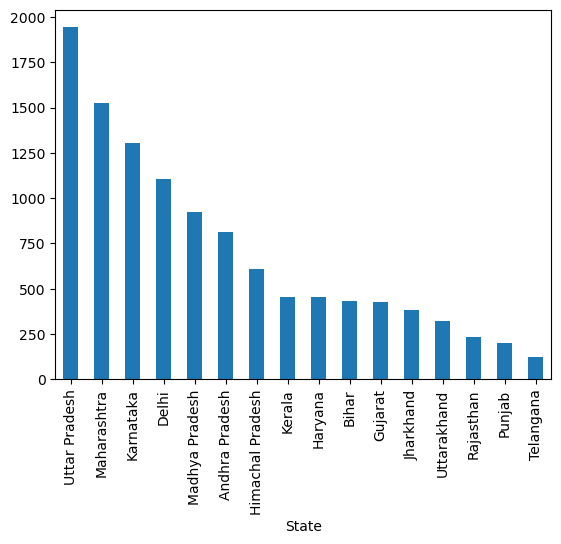

In [22]:
state_count = df['State'].value_counts()
state_count.plot(kind= 'bar')

### Insights from state distribution
- **Uttar Pradesh** leads with the highest entries (1944), followed by **Maharashtra** (1525) and **Karnataka** (1304), indicating strong market presence.
- Moderate counts in **Delhi** (1104) and **Madhya Pradesh** (921) suggest opportunities for growth.
- States like **Telangana** (125) and **Punjab** (200) have lower engagement, indicating potential areas for targeted marketing efforts.
- This distribution can guide resource allocation and marketing strategies to enhance customer engagement across regions.

### 5. Total sales per state
Calculating the total sales amount for each state in the dataset to understand the sales distribution across different geographical locations. 
- This analysis helps identify which states contribute the most to overall sales performance.



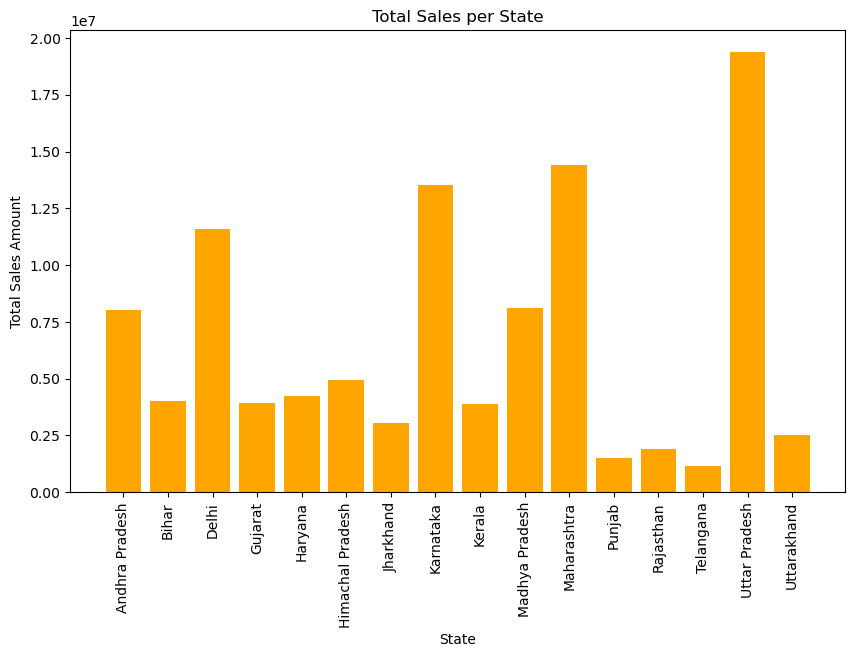

In [26]:
total_sales_per_state = df.groupby ('State')['Amount'].sum().reset_index()
total_sales_per_state.columns = ['State', 'Total_Sales']

# Bar chart for total sales by state
plt.figure(figsize=(10,6))
plt.bar(total_sales_per_state['State'], total_sales_per_state['Total_Sales'], color='orange')
plt.title('Total Sales per State')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout
plt.show()

The output presents the total sales amounts for each state in the dataset. Here are some insights:

- **Highest Sales**: **Uttar Pradesh** has the highest total sales amount at approximately **₹19,374,968**, indicating a strong market presence or customer engagement in that region.
- **Second Highest**: **Maharashtra** follows closely with total sales of **₹14,427,543**, also showcasing significant activity.
- **Other Notable States**: **Karnataka** and **Delhi** also report high sales figures of **₹13,523,540** and **₹11,603,819.45**, respectively, highlighting these states as key contributors to overall sales.
- **Lower Sales States**: States like **Punjab** and **Telangana** show lower total sales amounts, with figures of ₹1,525,800 and ₹1,151,490, suggesting potential areas for growth or increased marketing efforts.
  
This information is valuable for identifying strong markets and those that may require more attention or strategy adjustments.

### 6.Average order value per state
Calculating the average order value for each state by dividing the total sales amount by the total number of orders.
- This metric helps to assess customer spending behavior and can indicate how much, on average, customers are willing to spend per order in different regions.
- Understanding average order value across states can inform pricing strategies, promotional efforts, and resource allocation.

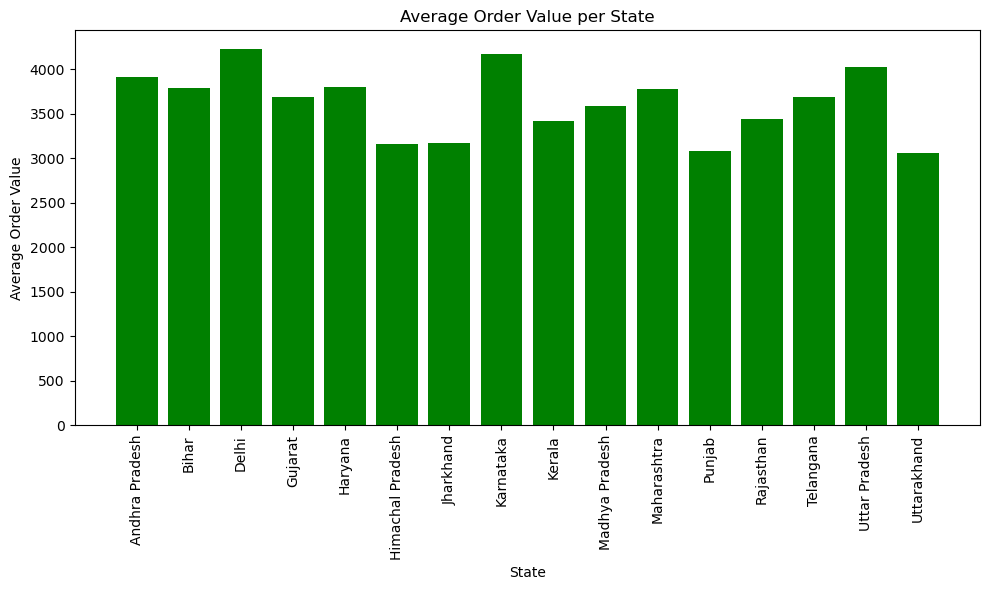

In [10]:
average_order_value = df.groupby('State').agg({'Amount':'sum', 'Orders':'sum'}).reset_index()
average_order_value['Average_Order_Value'] = average_order_value ['Amount'] / average_order_value['Orders']
average_order_value = average_order_value[['State', 'Average_Order_Value']]

#Bar chart for average order value by state
plt.figure(figsize=(10,6))
plt.bar(average_order_value['State'],average_order_value['Average_Order_Value'], color='green')
plt.title('Average Order Value per State')
plt.xlabel('State')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Insights on average order value per state
- **Highest Average Order Value**: **Delhi** has the highest average order value at approximately ₹4,235, indicating that customers in this state tend to spend more per order compared to other regions. This may suggest a higher purchasing power or a preference for premium products.

- **Lowest Average Order Value**: **Uttarakhand** has the lowest average order value at around ₹3,059. This could indicate budget-conscious spending habits among consumers in this state or a lower average price point for products sold.

- **Mid-range Values**: States like **Andhra Pradesh** and **Karnataka** show average order values close to ₹3,919 and ₹4,174, respectively. This suggests that these regions have a healthy level of consumer spending, which can be leveraged for targeted marketing strategies.

- **Consistency Across States**: Most states have average order values ranging from ₹3,000 to ₹4,300, indicating a relatively consistent spending behavior among consumers across different regions, with minor fluctuations based on local market conditions.

- **Opportunity for Growth**: The average order values in states like **Himachal Pradesh** and **Jharkhand** are lower (around ₹3,165 and ₹3,176). This presents an opportunity for businesses to explore strategies to increase the average transaction size, such as promotions or bundling offers.

 ### 7. Orders be gender
 calculating the total number of orders placed by each gender in the dataset.
 - This helps us understand the distribution of purchasing activity across different gender demographics.
 - Also helps to identify the proportion of orders contributed by each gender, which can inform targeted marketing strategies and product offerings.

<function matplotlib.pyplot.show(close=None, block=None)>

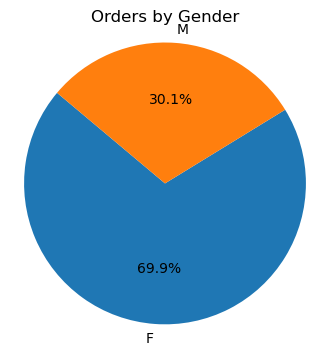

In [12]:
# Orders by Gender
order_by_gender = df.groupby ('Gender')['Orders'].sum().reset_index()

# Pie chart for orders by gender
plt.figure(figsize=(4,4))
plt.pie(order_by_gender['Orders'],labels=order_by_gender['Gender'],autopct='%1.1f%%', startangle=140)
plt.title('Orders by Gender')
plt.axis('equal') 
plt.show


### Key Insights
- The data reveals that female customers (F) made significantly more orders **19,548** than male customers (M) with **8,433** orders.
- This indicates stronger purchasing engagement from females, suggesting that marketing strategies could be tailored to better target this demographic.

### 8.Orders by age group
Analyzing the number of orders placed by different age groups to understand customer engagement across various demographics.
- This helps identify which age segments contribute most to total orders, informing targeted marketing strategies.

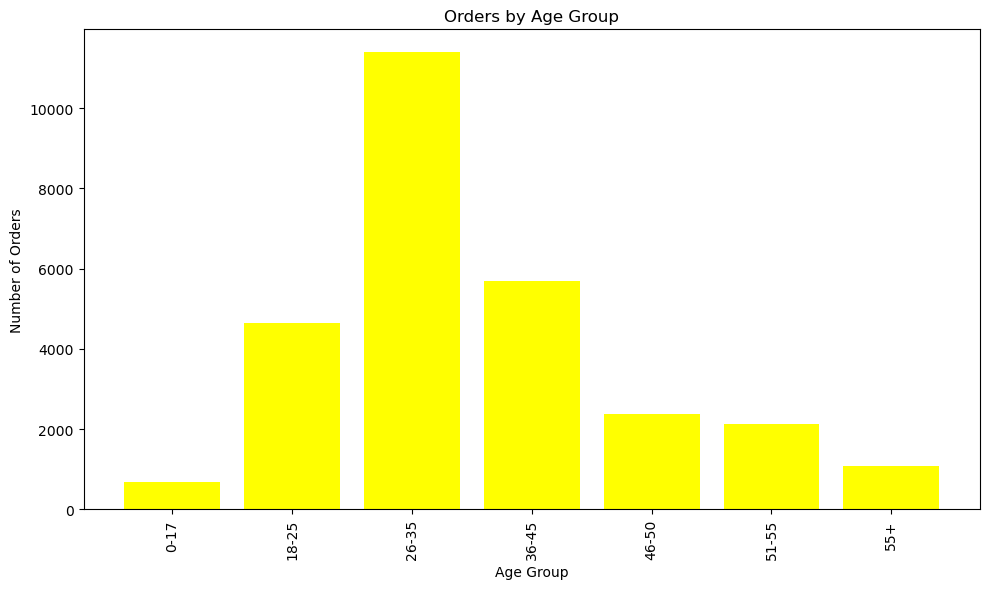

In [13]:
# Orders by Age Group
orders_by_age_group = df.groupby ('Age Group')['Orders'].sum().reset_index()

# Bar chart for orders by age group
plt.figure(figsize=(10,6))
plt.bar(orders_by_age_group['Age Group'], orders_by_age_group['Orders'], color='yellow')
plt.title('Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Insights from orders by age group
The orders distribution across age groups reveals that:
- The **26-35 age group** is the largest contributor to orders, indicating strong purchasing power and engagement.
- **Young adults (18-25)** also show notable activity, suggesting opportunities for trend-driven marketing.
- Orders from **middle-aged groups (36-45)** reflect a steady market presence, while older segments (46+) exhibit lower engagement, highlighting potential areas for targeted marketing efforts.
- Overall, focusing on the **younger and middle-aged** demographics could enhance sales and customer retention strategies.

### 9.Analysis of top-selling products
In this analysis, we are identifying the best-selling products based on the total number of orders. 
- By aggregating the order counts for each product, we can pinpoint which items are driving sales and customer engagement.
- This insight helps in inventory management, marketing strategies, and product promotions.


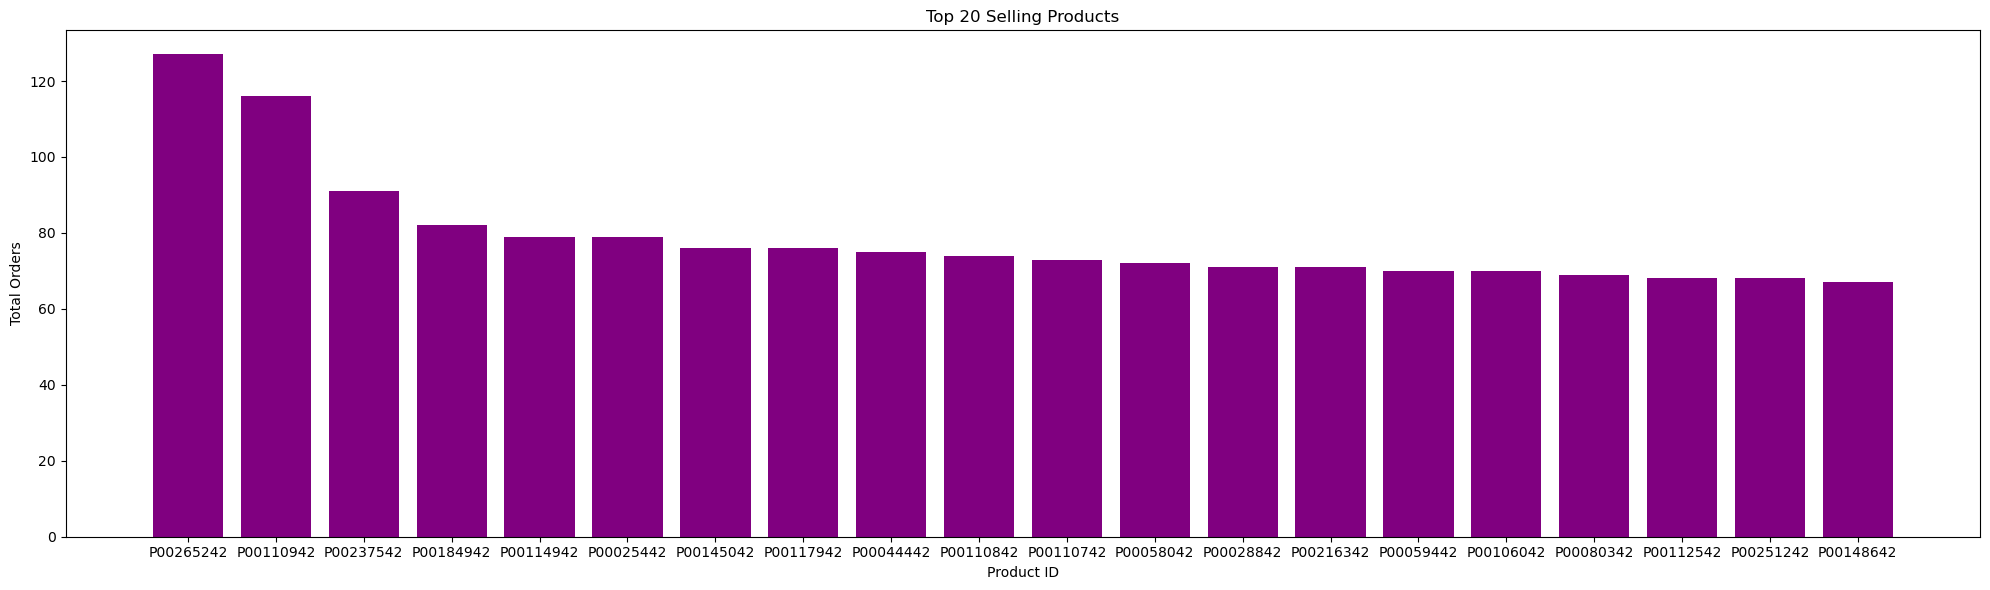

In [19]:
#Top-selling products
top_products = df.groupby('Product_ID')['Orders'].sum().reset_index()
top_products.columns = ['Product_ID', 'Total_Orders']
top_products = top_products.sort_values(by='Total_Orders', ascending=False)

#Get the top 29 products
top_20_products = top_products.head(20)

#Bar chart for top-selling products
plt.figure(figsize=(20,6))
plt.bar(top_20_products['Product_ID'], top_20_products['Total_Orders'], color='purple')
plt.title('Top 20 Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Orders')
plt.xticks()
plt.tight_layout()
plt.show()


### Insights from top-selling products output
- **Top Product Performance**: The product with ID P00265242 leads with 127 orders, indicating strong demand and potentially effective marketing or popularity among customers.
- **Consistent Demand**: Several products, such as P00110942 and P00237542, have also shown significant order volumes (116 and 91 orders, respectively), suggesting that they are well-received by customers.

- **Order Volume Distribution**: The top 20 products have order totals ranging from 67 to 127, highlighting a competitive landscape where even the lowest-selling products in this group are still generating substantial interest.

- **Strategic Focus**: Identifying these top products can guide strategic decisions such as increasing stock levels, enhancing visibility through targeted marketing, or exploring potential collaborations with suppliers.

### 10.Sales by product category analysis
Aggregating sales data by product category to understand which categories generate the most orders and revenue. 
 - This analysis provides insights into consumer preferences and helps identify categories that may require more marketing focus or inventory adjustments.

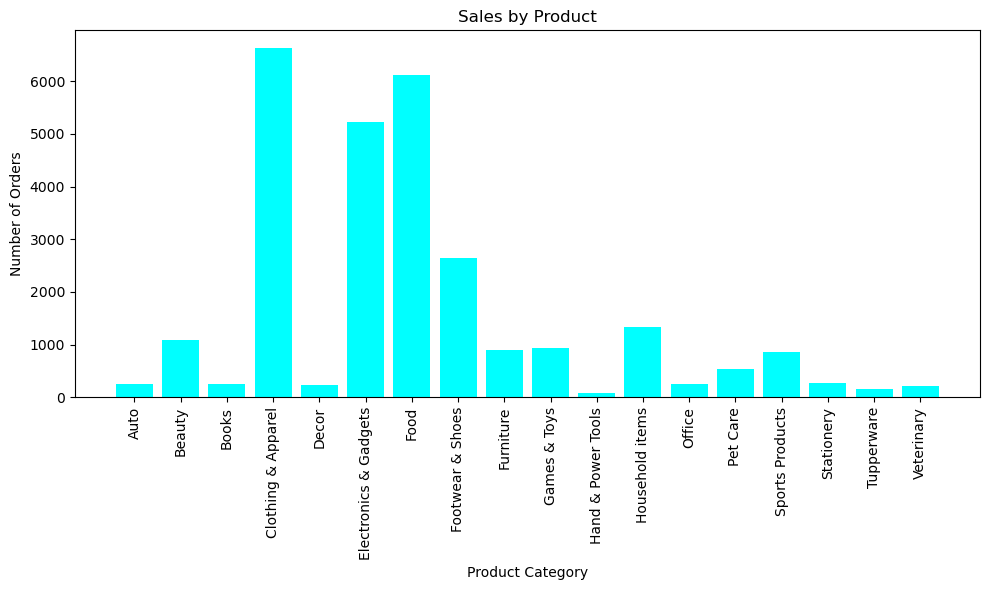

In [20]:
# Sales by Product Category
sales_by_category = df.groupby ('Product_Category').agg({'Orders':'sum', 'Amount':'sum'}).reset_index()

#Bar chart for sales by product category
plt.figure(figsize=(10,6))
plt.bar(sales_by_category['Product_Category'], sales_by_category['Orders'], color='cyan')
plt.title('Sales by Product')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Insights from sales by product category output
1. **Food** leads in both orders (6,110) and revenue (\$33.9M), showing strong consumer demand.
2. **Electronics & Gadgets** (5,226 orders, \$15.6M) and **Clothing & Apparel** (6,634 orders, \$16.5M) also perform well, indicating popular consumer interests.
3. **Footwear & Shoes** generates substantial sales (\$15.6M) with 2,646 orders.
4. **Beauty** (1,086 orders, \$1.96M) and **Sports Products** (870 orders, \$3.6M) show potential for growth.
5. Categories like **Auto** (239 orders, \$1.96M) and **Hand & Power Tools** (80 orders, \$405K) are underperforming and may need targeted marketing.


### 11. Total Orders by Occupation
Analyzing the distribution of total orders across different occupations to understand consumer behavior and preferences.
- This information can help tailor marketing strategies to target specific occupational groups effectively.

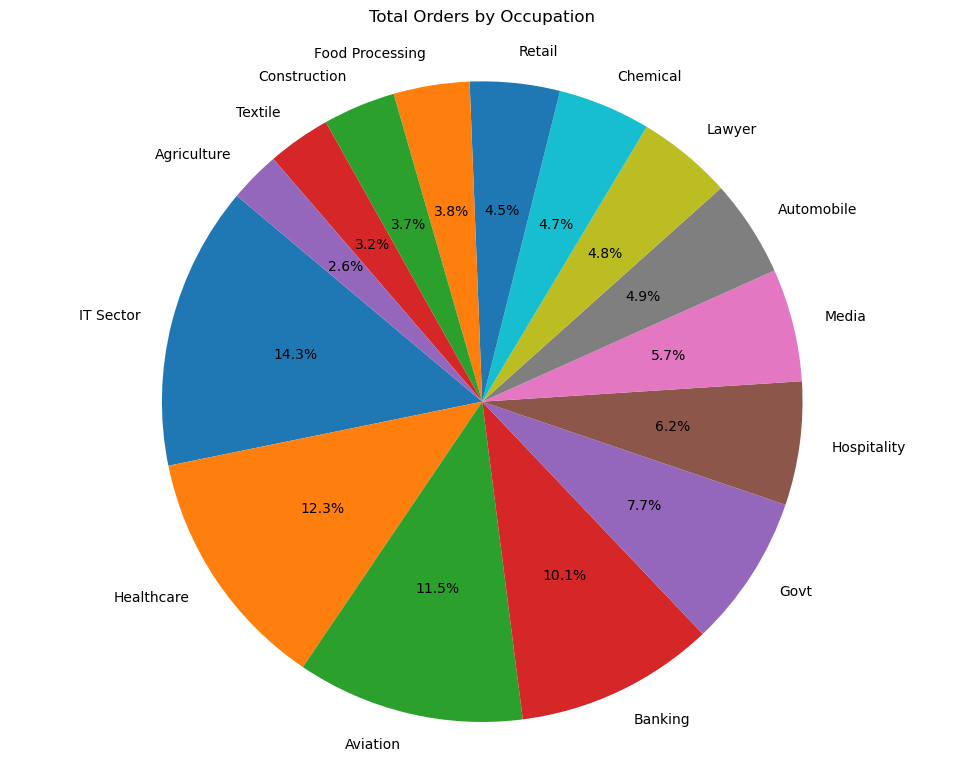

In [26]:
occupation_orders = df.groupby('Occupation')['Orders'].sum().reset_index()
occupation_orders.columns = ['Occupation', 'Total_Orders']

# Sort values by total orders
occupation_orders = occupation_orders.sort_values(by='Total_Orders', ascending=False)

# Pie chart for orders by occupation
plt.figure(figsize=(10,8))
plt.pie(
    occupation_orders['Total_Orders'],
    labels= occupation_orders['Occupation'],
    autopct= '%1.1f%%',
    startangle=140
)
plt.title('Total Orders by Occupation', pad=20)
plt.axis('equal')
plt.tight_layout(pad=2)
plt.show()


    

### Key Insights
- **IT Sector** leads with the highest number of orders (3,997), indicating a strong consumer engagement in technology-related products or services.
- **Healthcare and Aviation** follow closely, with orders of 3,455 and 3,215, respectively, highlighting significant demand in these critical sectors.
- Other notable occupations include **Banking** (2,817), **Government** (2,155), and **Hospitality** (1,739), each demonstrating considerable order volumes.
- Occupations such as **Retail** (1,270) and **Construction** (1,025) also contribute to the overall order count, suggesting diverse consumer interests across various fields.

### 12. Order Distribution
In this analysis, we visualize the distribution of the number of orders placed using a histogram combined with a kernel density estimate (KDE). 
- This helps us understand customer purchasing behavior, particularly the frequency of different order sizes.

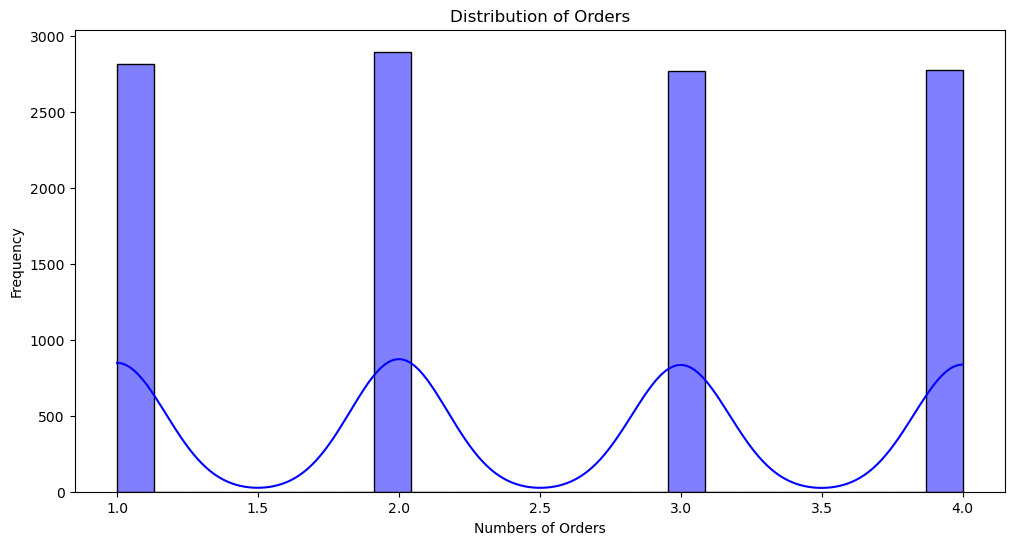

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df['Orders'], kde=True, color='blue')
plt.title('Distribution of Orders')
plt.xlabel('Numbers of Orders')
plt.ylabel('Frequency')
plt.show()

### Key Insights 
- **Popular Order Size**: The most common order size consists of 2 orders, accounting for 2,893 instances. This suggests that many customers prefer ordering multiple items in a single transaction.
- **Balanced Distribution**: The counts for orders of 1 (2,808), 3 (2,765), and 4 (2,773) indicate a relatively balanced distribution of order sizes, reflecting diverse customer preferences.
- **Focus on Order Optimization**: Given that most orders fall between 1 to 4 items, strategies to encourage larger order sizes, such as bundle offers or discounts on higher quantities, could effectively increase sales.

### 13. Amount Distribution
Visualizing the distribution of transaction amounts in our dataset to understand the spending behavior of customers. 
- This histogram will help identify common spending ranges and any potential outliers that may exist in the data.
- The addition of a Kernel Density Estimate (KDE) curve provides a smoother representation of the distribution, allowing for better insights into the data's underlying patterns.

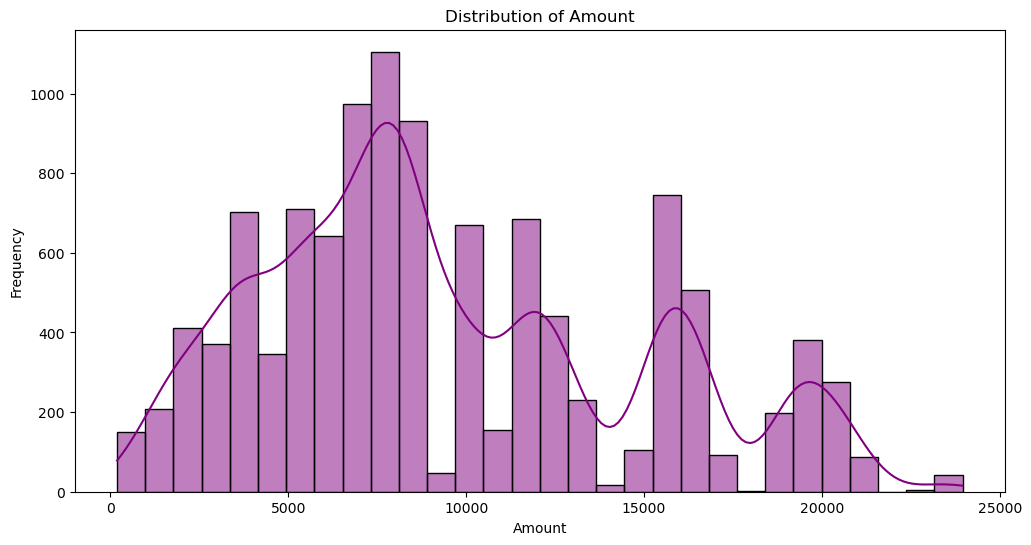

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df['Amount'], bins=30, kde=True, color='purple')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


### 14. Correlation Heatmap
Generating a correlation heatmap to visualize the relationships between various numeric columns in our dataset, including Age, Marital Status, Orders, and Amount.
- This heatmap will help us identify potential correlations, such as how age or marital status may influence order volume and spending amounts.
- Understanding these relationships can guide our analysis and inform marketing strategies.


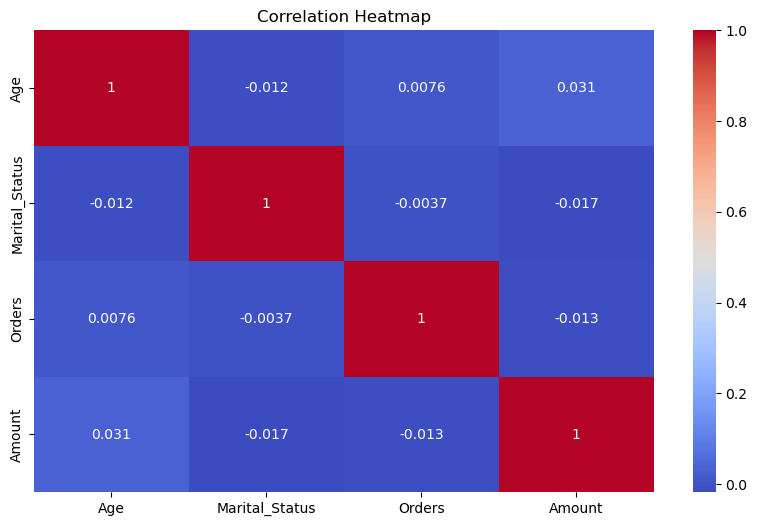

In [33]:
numeric_columns = ['Age', 'Marital_Status', 'Orders', 'Amount']
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Key Insights
- The correlation heatmap indicates weak relationships among Age, Marital Status, Orders, and Amount, with all coefficients near zero.
- **Age** shows a slight **positive correlation** (0.031) with Amount, suggesting older customers may spend marginally more.
- Overall, these variables do not significantly influence each other, indicating that other factors may drive sales and order frequency.

### 15. Total Count of each gender based on marital status & gender
This bar chart visualizes the distribution of orders based on marital status and gender.
- This insight can inform targeted marketing strategies to engage these demographics effectively, especially during festive occasions.

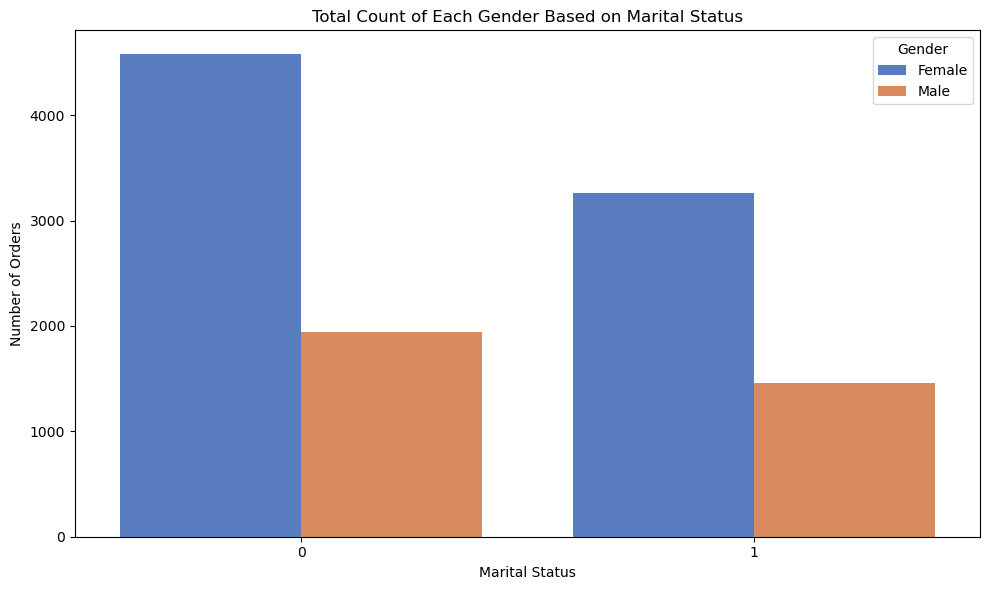

In [37]:
ms = df.groupby(['Marital_Status', 'Gender']).size().reset_index(name='counts').sort_values('counts', ascending=False)

#Replace values for better readability
ms['Marital_Status']= ms['Marital_Status'].replace({'0':'Not Married','1':'Married'})
ms['Gender']= ms['Gender'].replace({'F':'Female','M':'Male'})

#Create grouped bar chart using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=ms, x='Marital_Status', y='counts', hue='Gender', palette='muted')

#update layout for better aesthetics
plt.title('Total Count of Each Gender Based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Orders')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

### Key Insights
- The data indicates that **Females** are more active in placing orders compared to Males, regardless of marital status.
- Specifically, **4,573** orders were recorded from **Not Married Females**, while **1,945** orders were placed by **Not Married Males**.
- Among Married individuals, **3,259** orders were attributed to **Married Females**, compared to **1,462** orders from **Married Males**.
- This suggests a strong engagement from female customers, particularly those who are not married, presenting an opportunity for targeted marketing strategies.

### 16. Box plot of order amounts by state
This analysis explores the distribution of order amounts across different states. 
- Using a box plot, we can observe the spread of order values, including medians and outliers, which helps in identifying any states with particularly high or low order amounts.
- This visualization can guide regional strategies by highlighting states with significant spending patterns.

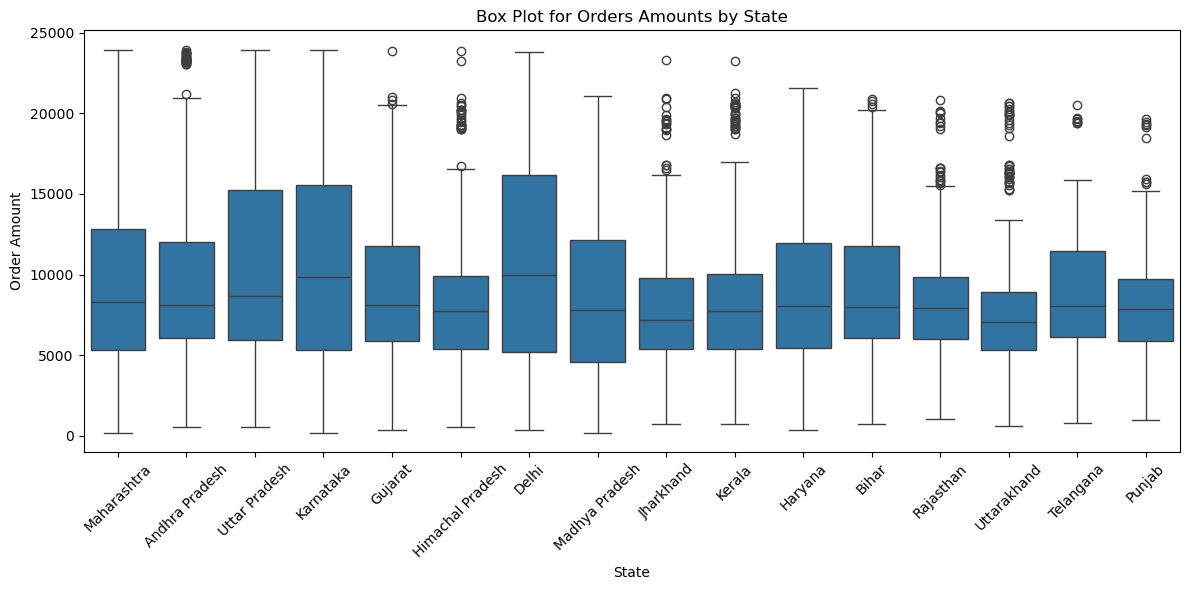

In [13]:
# Box plot for amount by state
plt.figure(figsize=(12,6))
sns.boxplot(x='State', y='Amount', data=df)
plt.title('Box Plot for Orders Amounts by State')
plt.xlabel('State')
plt.ylabel('Order Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Key Insights
The box plot reveals significant variations in order amounts across different states:
 - **Maharashtra** and **Karnataka** show higher median order amounts, indicating potentially stronger purchasing power or higher-value orders in these states.
 - **Uttar Pradesh** and **Gujarat** also have high maximum order values, though their median values are lower than Maharashtra.
 - States like **Jharkhand, Kerala, and Punjab** show relatively lower order amounts overall, with smaller spreads, indicating more consistent but lower-value purchases.
 - Several states have outliers, suggesting occasional high-value orders, which could indicate specific segments of affluent customers or bulk orders in those regions.

### 17. Orders by age group and product category
This analysis aims to identify purchasing trends across different age groups and product categories. 
- By visualizing the total orders, we can understand which age groups favor certain categories, allowing for more targeted marketing and product recommendations.

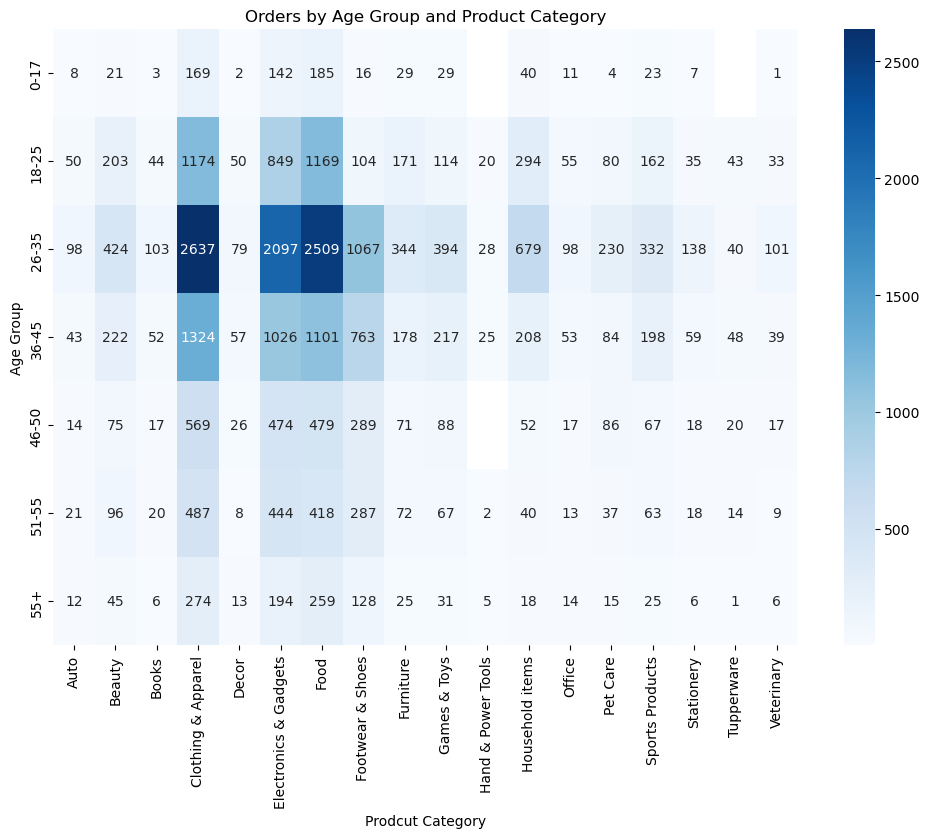

In [20]:
# Group by Age Group and Product Category
multi_group_orders = df.groupby (['Age Group', 'Product_Category'])['Orders'].sum().unstack()

# Heatmap for multivariate analysis
plt.figure(figsize=(12,8))
sns.heatmap(multi_group_orders, cmap='Blues', annot=True, fmt='g')
plt.title('Orders by Age Group and Product Category')
plt.xlabel('Prodcut Category')
plt.ylabel('Age Group')
plt.show()

### 18. Total Orders by zone
Analyzing the total number of orders segmented by different zones in our dataset.
- First grouping the data by the Zone column and sum the Orders for each zone to obtain the total number of orders per zone.
- This aggregated data is then visualized using a grouped bar chart, which allows us to easily compare the total orders across various zones.

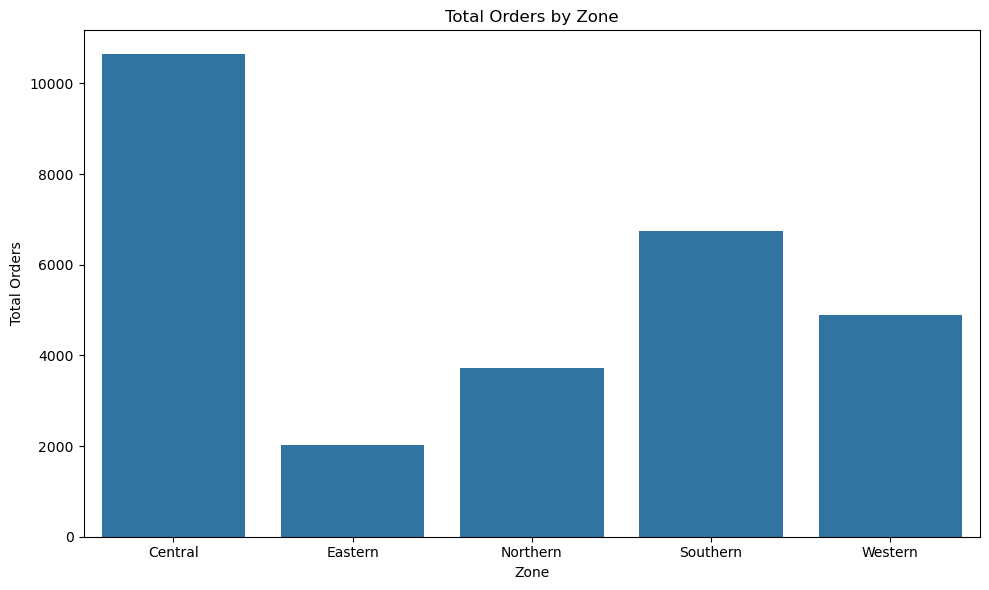

In [22]:
zone_orders = df.groupby('Zone')['Orders'].sum().reset_index()
zone_orders.columns = ['Zone', 'Total_Orders']

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=zone_orders, x='Zone', y='Total_Orders')

# Update layout for better aesthetics
plt.title('Total Orders by Zone')
plt.xlabel('Zone')
plt.ylabel('Total Orders')
plt.tight_layout()
plt.show()

### Key Insights
- **Central Zone Dominance**: The Central zone leads with **10,623** orders, indicating strong engagement and spending during Diwali.

- **Low Engagement in Eastern Zone**: The Eastern zone's **2,015** orders suggest potential cultural differences or market challenges.

- **Diverse Regional Practices**: Northern **(3,727)** and Southern **(6,740)** zones show moderate participation, indicating varied Diwali observances.

- **Logistics Focus**: Concentrated orders in the Central zone highlight the need for efficient supply chain management to meet high demand.

- **Tailored Marketing**: Localized marketing strategies can enhance appeal and drive sales by aligning with regional customs and preferences.

### 19. Total sales amount by product category
Aggregating the total sales amounts for each product category to identify trends in sales performance during Diwali.

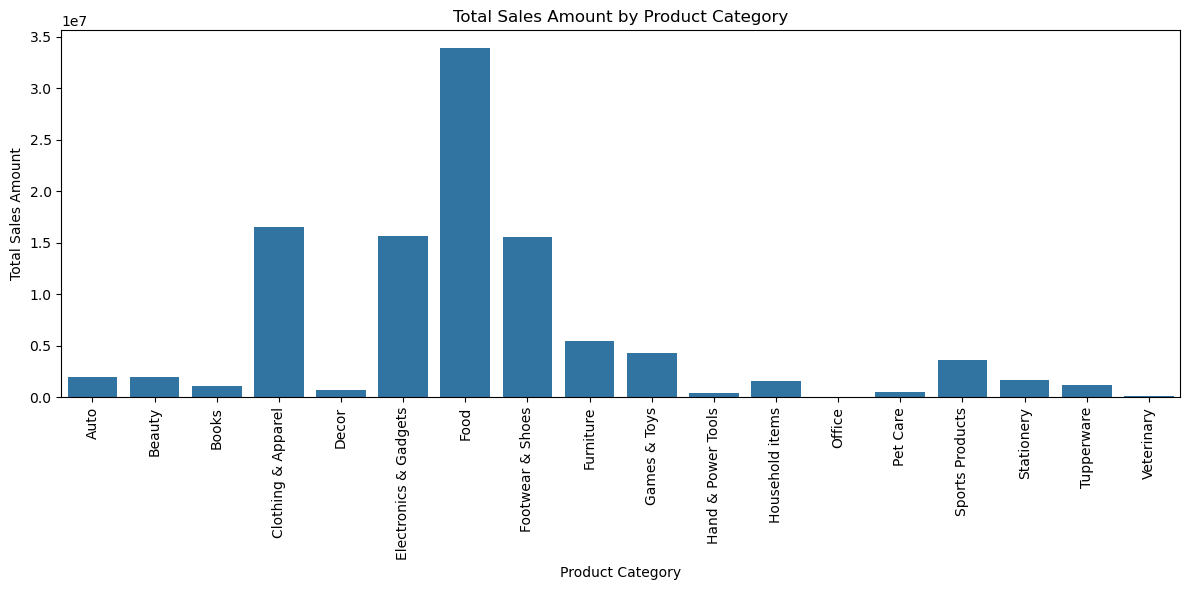

In [23]:
category_sales = df.groupby ('Product_Category')['Amount'].sum().reset_index()
category_sales.columns = ['Product_Category', 'Total_Sales']

# Bar chart for total sales by product category
plt.figure(figsize=(12,6))
sns.barplot(data= category_sales, x='Product_Category', y='Total_Sales')
plt.title('Total Sales Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Key Insights
- **Top Category - Food**: Leads with ₹33,933,883.50, reflecting high demand for festive treats.
- **Strong Electronics Sales**: Generated ₹15,643,846, showing popularity for tech gifts.
- **Clothing & Apparel**: Achieved ₹16,495,019 in sales, indicating a trend towards new attire for celebrations.
- **Footwear Demand**: Totaling ₹15,575,209.45, suggesting shoppers prioritize stylish footwear.
- **Underperforming Categories**: Office supplies (₹81,936) and veterinary products (₹112,702) show low interest, signaling a need for revised marketing.

## 20. Clustering for targeted marketing

In data-driven marketing, understanding customer segments is key to delivering targeted promotions and improving customer satisfaction. By identifying clusters within customer data, we can segment customers based on their demographics and purchase behavior. This enables us to tailor marketing strategies for each group, making campaigns more relevant and effective.

### Benefits of clustering in marketing
Clustering can significantly enhance marketing efforts by:
1. **Personalization**: Understanding different groups allows for customized marketing messages that resonate with each segment.
2. **Resource Optimization**: Helps allocate marketing resources effectively by focusing on high-value segments.
3. **Customer Retention**: Identifying clusters helps tailor offers that increase engagement and loyalty among different customer types.

In this project, clustering is used to explore demographic and purchase behavior patterns within Diwali sales data. By analyzing clusters, aiming to uncover key customer segments, identify high-spending groups, and guide targeted marketing initiatives.

---

### Code overview

In the following code, we prepare and analyze our data for clustering to gain insights into customer demographics and spending:
  
1. **Data preprocessing**: 
   - We first load and clean the dataset by removing unnecessary columns and handling any missing values. 
   - The clustering features are selected to include demographic and categorical attributes, excluding the `Amount` column, as we want to explore the spending behavior within the clusters rather than use it as a clustering feature.  
  
2. **Feature transformation**:
   - Numerical features like `Age` are scaled using `StandardScaler` to ensure uniformity in clustering.
   - Categorical features (`Gender`, `Marital_Status`, `Occupation`, `State`, `Product_Category`) are transformed using `OneHotEncoder` to convert them into binary variables, allowing the clustering algorithm to process these values effectively.
  

3. **KMeans clustering**:
   - Create a pipeline combining preprocessing and KMeans clustering with `n_clusters=4`, aiming to segment the data into four distinct groups. The optimal number of clusters (`n_clusters`) is based on experimentation.
   - The pipeline is fit on the selected features, and each customer is assigned to a demographic cluster.  
  
4. **Cluster analysis**:
   - Analyze the clusters to understand the distribution and behavior of each segment:
      - **Cluster sizes**: Shows the number of customers in each cluster.
      - **Average spending**: Computes the mean amount spent in each cluster, helping identify high- or low-spending groups.
      - **Demographic insights**: Analyzes the mean `Age` and distribution of categorical features within each cluster.  
  
This clustering analysis gives us actionable insights into customer segments, paving the way for targeted marketing strategies tailored to each demographic group.


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [26]:
# drop unnecessary columns and handle NaN values
df = df.drop(columns= ['User_ID', 'Cust_name', 'Product_ID', 'Status', 'unnamed1', 'Zone', 'Orders'], errors='ignore' )
df = df.dropna() 

# select the features for clustering 
clustering_features= ['Gender', 'Age', 'Marital_Status', 'Occupation', 'State', 'Product_Category']

# Define preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers =[
        ('num', StandardScaler(), ['Age']), 
        ('cat', OneHotEncoder(drop='first'), ['Gender', 'Marital_Status', 'Occupation', 'State', 'Product_Category'])
    ])

# Create a pipeline that includes preprocessing and KMeans clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))  # Adjust n_clusters based on optimal selection
])

# Fit the pipeline on the selected features
pipeline.fit(df[clustering_features])

# Add the cluster labels to the original DataFrame
df['Demographic_Cluster'] = pipeline.predict(df[clustering_features])

# View cluster sizes to understand the distribution of data points across clusters
cluster_sizes = df['Demographic_Cluster'].value_counts()

# Calculate and display the mean values for `Amount` by cluster to understand spending behavior
amount_summary = df.groupby('Demographic_Cluster')['Amount'].mean()

# Calculate and display the mean values for numeric features by cluster for interpretability
numeric_columns = ['Age']
cluster_summary = df.groupby('Demographic_Cluster')[numeric_columns].mean()

# Analyze categorical features within each cluster
categorical_columns = ['Gender', 'Marital_Status', 'Occupation', 'State', 'Product_Category']
categorical_summary = {}

for col in categorical_columns:
    categorical_summary[col] = df.groupby('Demographic_Cluster')[col].value_counts(normalize=True)

# Set display options to avoid truncation
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Do not truncate based on width

# Display Cluster Sizes
print("Cluster Sizes:")
print(df['Demographic_Cluster'].value_counts())

# Display mean values for `Amount` by cluster
print("\nAverage Amount Spent by Cluster:")
print(df.groupby('Demographic_Cluster')['Amount'].mean())

# Display mean values for numeric features by cluster
print("\nCluster Summary (Mean of Numeric Columns):")
print(df.groupby('Demographic_Cluster')['Age'].mean())

# Display proportions of each categorical feature within each cluster
print("\nCategorical Summary by Cluster (Proportion of each category):")
for col in ['Gender', 'Marital_Status', 'Occupation', 'State', 'Product_Category']:
    print(f"\n{col}:\n{df.groupby('Demographic_Cluster')[col].value_counts(normalize=True)}")


Cluster Sizes:
Demographic_Cluster
2    4579
3    3069
1    2003
0    1588
Name: count, dtype: int64

Average Amount Spent by Cluster:
Demographic_Cluster
0     7503.680101
1     6212.605592
2    11285.459474
3     9844.679211
Name: Amount, dtype: float64

Cluster Summary (Mean of Numeric Columns):
Demographic_Cluster
0    29.889169
1    29.629556
2    28.916139
3    51.729554
Name: Age, dtype: float64

Categorical Summary by Cluster (Proportion of each category):

Gender:
Demographic_Cluster  Gender
0                    F         0.707809
                     M         0.292191
1                    F         0.698452
                     M         0.301548
2                    F         0.705831
                     M         0.294169
3                    F         0.676768
                     M         0.323232
Name: proportion, dtype: float64

Marital_Status:
Demographic_Cluster  Marital_Status
0                    0                 0.562343
                     1                 0

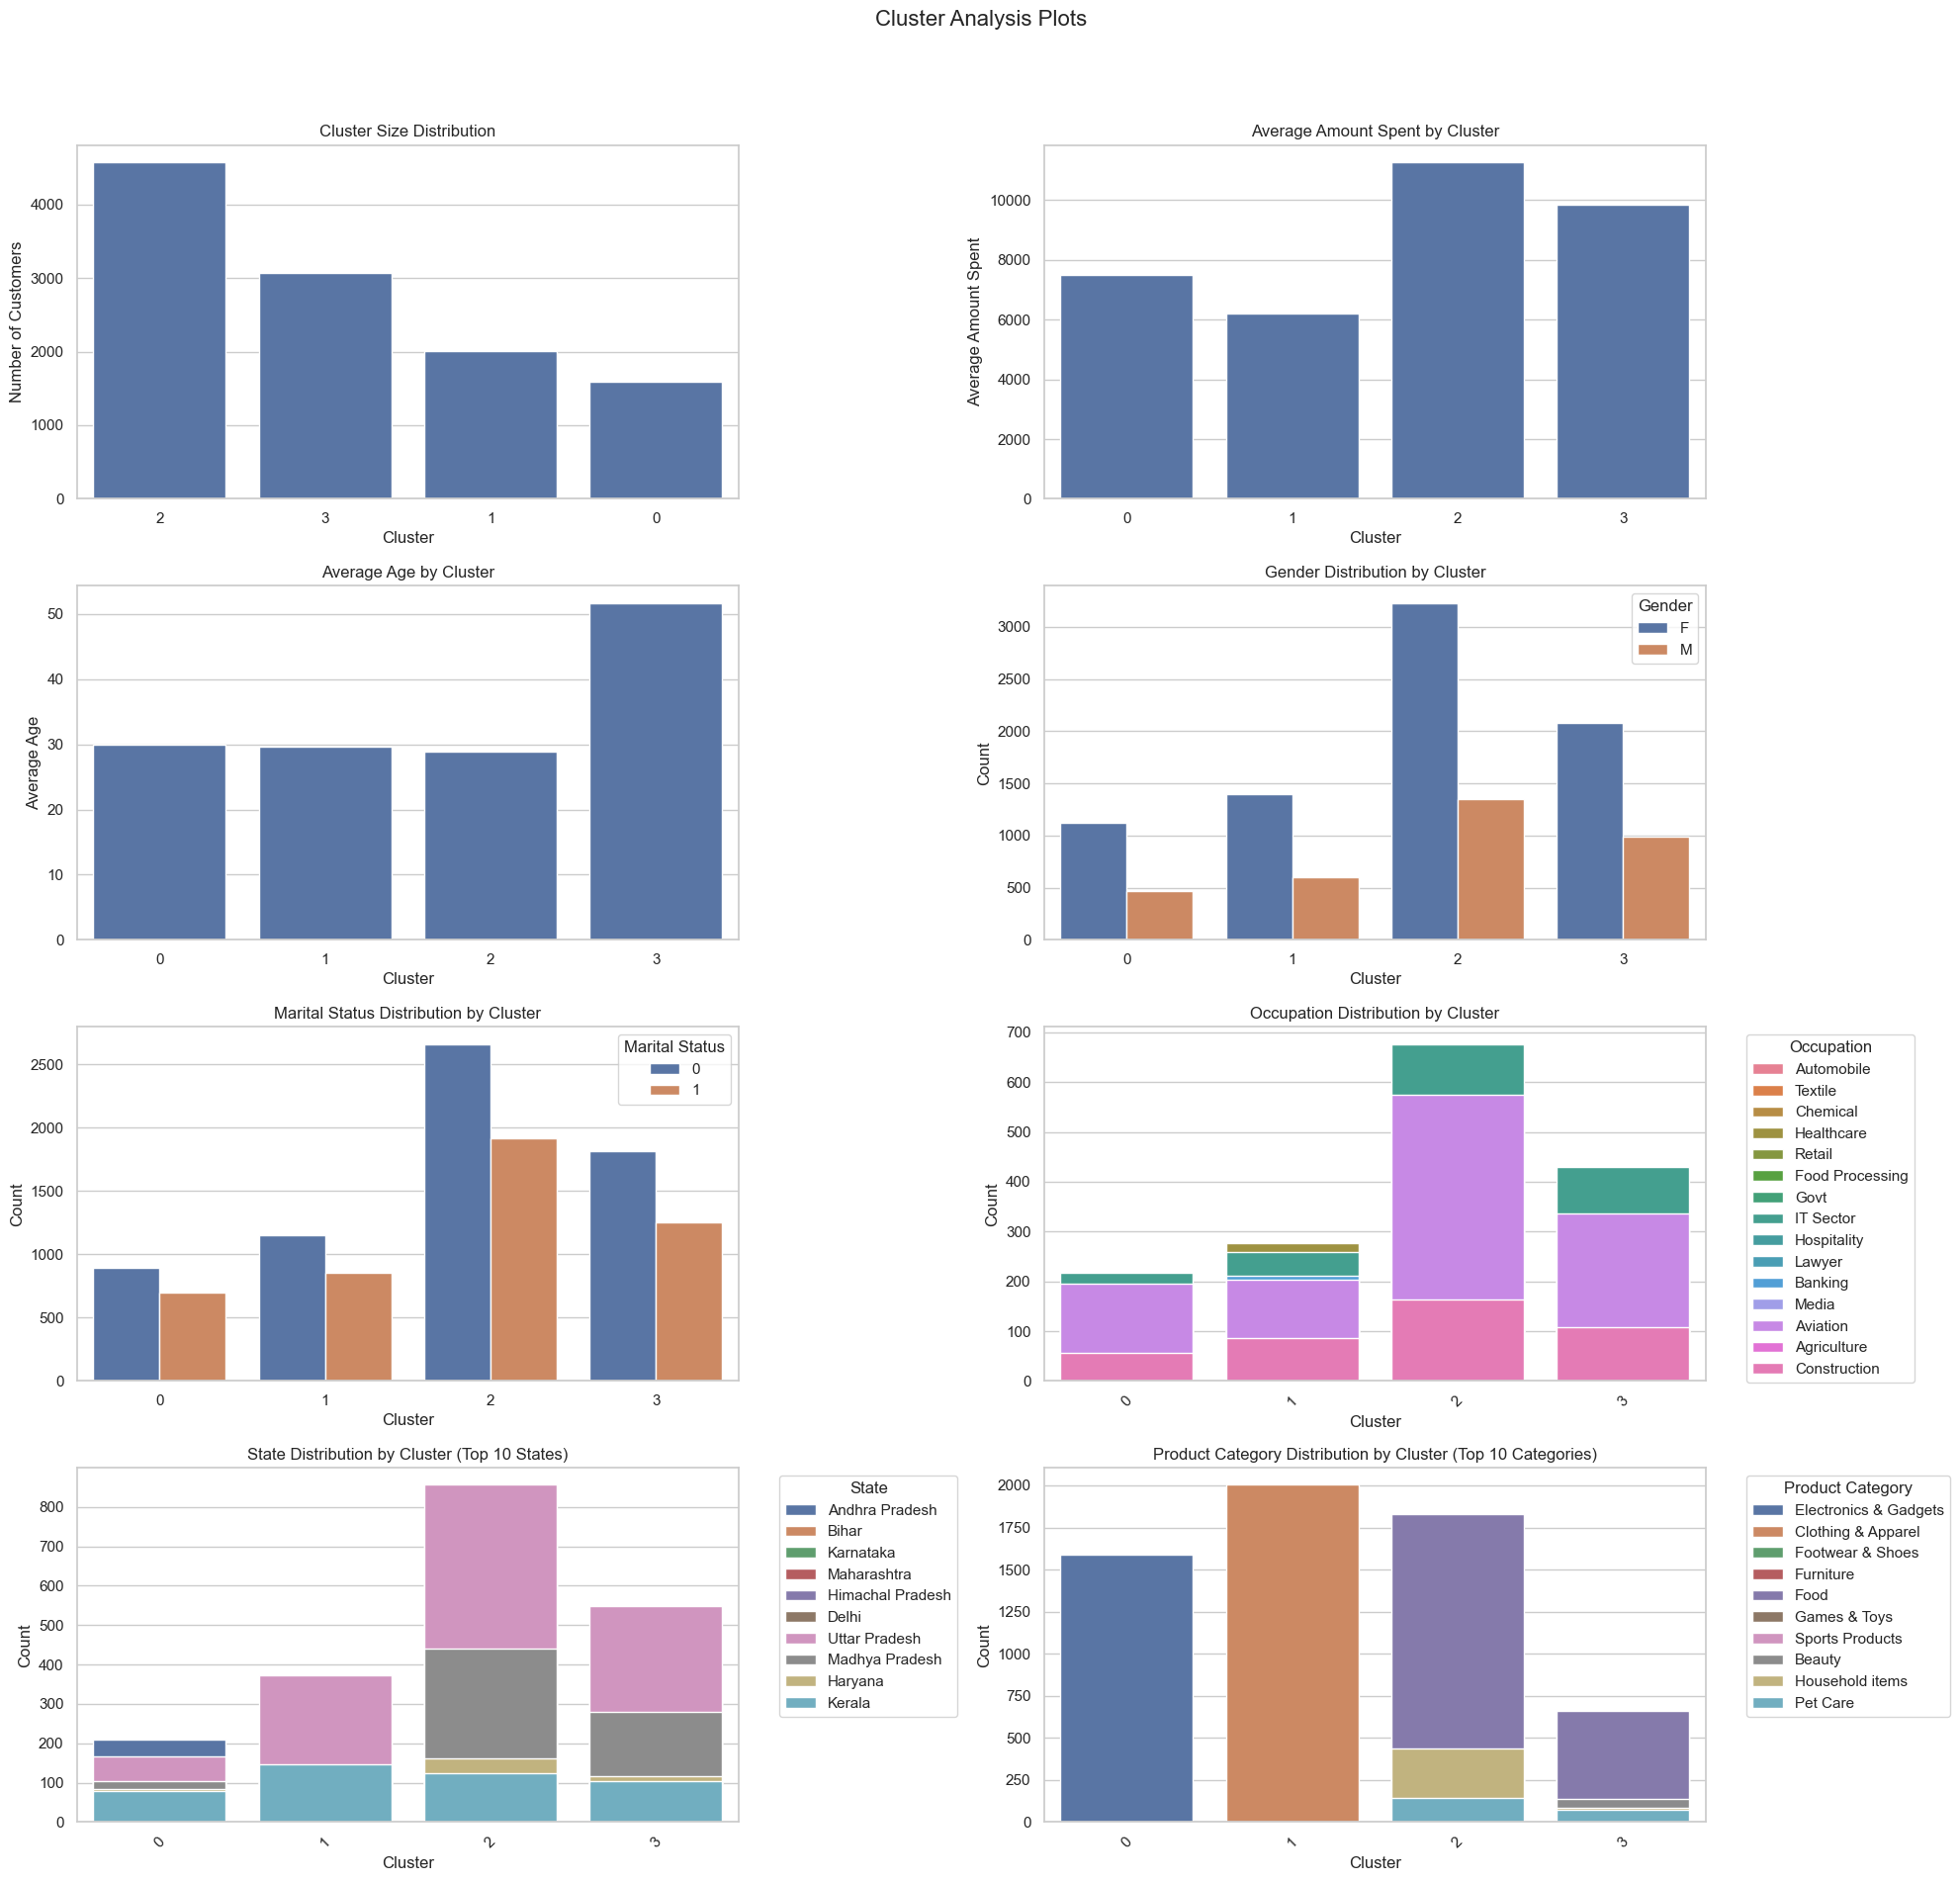

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a 4x2 grid for all the subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # Adjust size as needed
fig.suptitle("Cluster Analysis Plots", fontsize=16)

# 1. Cluster Size Distribution
sns.countplot(x=df['Demographic_Cluster'], order=df['Demographic_Cluster'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('Cluster Size Distribution')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Number of Customers')

# 2. Average Amount Spent by Cluster
sns.barplot(x=amount_summary.index, y=amount_summary.values, ax=axes[0, 1])
axes[0, 1].set_title('Average Amount Spent by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Average Amount Spent')

# 3. Age Distribution by Cluster
sns.barplot(x=cluster_summary.index, y=cluster_summary['Age'], ax=axes[1, 0])
axes[1, 0].set_title('Average Age by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Average Age')

# 4. Gender Distribution by Cluster
sns.countplot(x='Demographic_Cluster', hue='Gender', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Gender')

# 5. Marital Status Distribution by Cluster
sns.countplot(x='Demographic_Cluster', hue='Marital_Status', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Marital Status Distribution by Cluster')
axes[2, 0].set_xlabel('Cluster')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Marital Status')

# 6. Occupation Distribution by Cluster
sns.countplot(x='Demographic_Cluster', hue='Occupation', data=df, dodge=False, ax=axes[2, 1])
axes[2, 1].set_title('Occupation Distribution by Cluster')
axes[2, 1].set_xlabel('Cluster')
axes[2, 1].set_ylabel('Count')
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

# 7. State Distribution by Cluster (Top 10 States for readability)
top_states = df['State'].value_counts().index[:10]
sns.countplot(x='Demographic_Cluster', hue='State', data=df[df['State'].isin(top_states)], dodge=False, ax=axes[3, 0])
axes[3, 0].set_title('State Distribution by Cluster (Top 10 States)')
axes[3, 0].set_xlabel('Cluster')
axes[3, 0].set_ylabel('Count')
axes[3, 0].tick_params(axis='x', rotation=45)
axes[3, 0].legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

# 8. Product Category Distribution by Cluster (Top 10 Categories)
top_categories = df['Product_Category'].value_counts().index[:10]
sns.countplot(x='Demographic_Cluster', hue='Product_Category', data=df[df['Product_Category'].isin(top_categories)], dodge=False, ax=axes[3, 1])
axes[3, 1].set_title('Product Category Distribution by Cluster (Top 10 Categories)')
axes[3, 1].set_xlabel('Cluster')
axes[3, 1].set_ylabel('Count')
axes[3, 1].tick_params(axis='x', rotation=45)
axes[3, 1].legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the main title
plt.show()


# Clustering interpretation and insights for targeted marketing

### Cluster 2: High spenders

- **Profile**: Younger, high-income earners around 29 years old.
- **Spending**: 11,285 on average, mainly on food, footwear, and household items.
- **Opportunity**: Target them with premium and exclusive offers.

### Cluster 3: Mature buyers

- **Profile**: Older customers, averaging 51 years.
- **Spending**: 9,844 on a variety of practical items like food, electronics, and clothing.
- **Opportunity**: Appeal to them with campaigns focused on quality and reliability.

### Cluster 0: Tech enthusiasts

- **Profile**: Young adults around 30, with a focus on electronics.
- **Spending**: 7,503 on average, entirely on gadgets.
- **Opportunity**: Highlight tech deals and exclusive product launches.

### Cluster 1: Budget fashion shoppers

- **Profile**: Primarily young females focused on apparel.
- **Spending**: 6,212 on average, solely on clothing.
- **Opportunity**: Engage them with affordable, trendy fashion promotions.

---

Each cluster has distinct preferences, allowing for targeted marketing:
- Premium offers for high spenders,
- Quality-focused ads for mature buyers,
- Tech promotions for gadget enthusiasts, and
- Budget-friendly fashion deals for apparel shoppers.

In summary, the analysis of Diwali sales data reveals four distinct customer clusters with specific spending behaviors and product preferences. By tailoring marketing strategies to each cluster, the marketplace can maximize engagement and improve sales. High spenders can be drawn in with premium offerings, mature buyers with quality-focused ads, tech enthusiasts with gadget promotions, and budget-conscious fashion shoppers with affordable deals. This targeted approach allows for efficient allocation of marketing resources, ensuring each customer segment receives relevant, impactful promotions, enhancing overall customer satisfaction and loyalty.
